<a href="https://colab.research.google.com/github/umerijazX/ML-Portfolio/blob/main/ML%20Portfolio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read the CSV file
df = pd.read_csv('ai_job_market_insights.csv')

# Display basic information about the dataset
print(df.info())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Job_Title              500 non-null    object 
 1   Industry               500 non-null    object 
 2   Company_Size           500 non-null    object 
 3   Location               500 non-null    object 
 4   AI_Adoption_Level      500 non-null    object 
 5   Automation_Risk        500 non-null    object 
 6   Required_Skills        500 non-null    object 
 7   Salary_USD             500 non-null    float64
 8   Remote_Friendly        500 non-null    object 
 9   Job_Growth_Projection  500 non-null    object 
dtypes: float64(1), object(9)
memory usage: 39.2+ KB
None


First few rows of the dataset:
               Job_Title       Industry Company_Size   Location  \
0  Cybersecurity Analyst  Entertainment        Small      Dubai   
1   Marketing Specialist     Technology        Large  Singapore   
2          AI Researcher     Technology        Large  Singapore   
3          Sales Manager         Retail        Small     Berlin   
4  Cybersecurity Analyst  Entertainment        Small      Tokyo   

  AI_Adoption_Level Automation_Risk     Required_Skills     Salary_USD  \
0            Medium            High        UX/UI Design  111392.165243   
1            Medium            High           Marketing   93792.562466   
2            Medium            High        UX/UI Design  107170.263069   
3               Low            High  Project Management   93027.953758   
4               Low             Low          JavaScript   87752.922171   

  Remote_Friendly Job_Growth_Projection  
0             Yes                Growth  
1              No               Decli

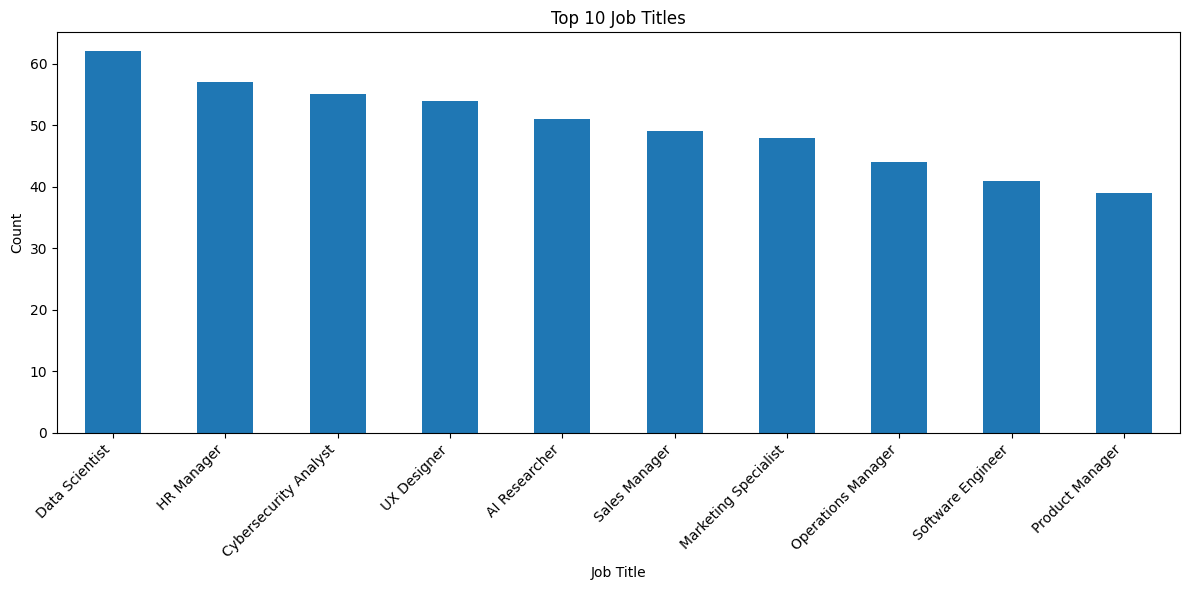

Data overview and visualization complete.


In [17]:
# Display the first few rows of the dataset
print("\
First few rows of the dataset:")
print(df.head())

# Create a bar plot of job titles
plt.figure(figsize=(12, 6))
df['Job_Title'].value_counts().head(10).plot(kind='bar')
plt.title('Top 10 Job Titles')
plt.xlabel('Job Title')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

print("Data overview and visualization complete.")

In [18]:
#Data Cleaning

In [19]:

print("Original dataset shape:", df.shape)
print("\
Missing values:\
", df.isnull().sum())
print("\
Data types:\
", df.dtypes)


Original dataset shape: (500, 10)
Missing values: Job_Title                0
Industry                 0
Company_Size             0
Location                 0
AI_Adoption_Level        0
Automation_Risk          0
Required_Skills          0
Salary_USD               0
Remote_Friendly          0
Job_Growth_Projection    0
dtype: int64
Data types: Job_Title                 object
Industry                  object
Company_Size              object
Location                  object
AI_Adoption_Level         object
Automation_Risk           object
Required_Skills           object
Salary_USD               float64
Remote_Friendly           object
Job_Growth_Projection     object
dtype: object


In [21]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
import numpy as np
# Handle missing values
numeric_columns = df.select_dtypes(include=[np.number]).columns
categorical_columns = df.select_dtypes(exclude=[np.number]).columns

# Impute missing values
numeric_imputer = SimpleImputer(strategy='mean')
categorical_imputer = SimpleImputer(strategy='most_frequent')

df[numeric_columns] = numeric_imputer.fit_transform(df[numeric_columns])
df[categorical_columns] = categorical_imputer.fit_transform(df[categorical_columns])



In [22]:
print("\
Cleaned dataset shape:", df.shape)
print("\
Missing values after cleaning:\
", df.isnull().sum())
print("\
Data types after cleaning:\
", df.dtypes)


Cleaned dataset shape: (500, 10)
Missing values after cleaning: Job_Title                0
Industry                 0
Company_Size             0
Location                 0
AI_Adoption_Level        0
Automation_Risk          0
Required_Skills          0
Salary_USD               0
Remote_Friendly          0
Job_Growth_Projection    0
dtype: int64
Data types after cleaning: Job_Title                 object
Industry                  object
Company_Size              object
Location                  object
AI_Adoption_Level         object
Automation_Risk           object
Required_Skills           object
Salary_USD               float64
Remote_Friendly           object
Job_Growth_Projection     object
dtype: object


In [23]:

# Save the cleaned data
df.to_csv('cleaned_ai_job_market_insights.csv', index=False)
print("\
Cleaned data saved to 'cleaned_ai_job_market_insights.csv'")

# Display the first few rows of the cleaned dataset
print("\
First few rows of the cleaned dataset:")
print(df.head())

Cleaned data saved to 'cleaned_ai_job_market_insights.csv'
First few rows of the cleaned dataset:
               Job_Title       Industry Company_Size   Location  \
0  Cybersecurity Analyst  Entertainment        Small      Dubai   
1   Marketing Specialist     Technology        Large  Singapore   
2          AI Researcher     Technology        Large  Singapore   
3          Sales Manager         Retail        Small     Berlin   
4  Cybersecurity Analyst  Entertainment        Small      Tokyo   

  AI_Adoption_Level Automation_Risk     Required_Skills     Salary_USD  \
0            Medium            High        UX/UI Design  111392.165243   
1            Medium            High           Marketing   93792.562466   
2            Medium            High        UX/UI Design  107170.263069   
3               Low            High  Project Management   93027.953758   
4               Low             Low          JavaScript   87752.922171   

  Remote_Friendly Job_Growth_Projection  
0           

In [24]:
# Model Building

In [30]:

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer


print("Data shape:", df.shape)
print("\
Column types:")
print(df.dtypes)

print("\
Unique values in 'Remote_Friendly':")
print(df['Remote_Friendly'].unique())

print("\
Sample of the data:")
print(df.head().to_string())



Data shape: (500, 10)
Column types:
Job_Title                 object
Industry                  object
Company_Size              object
Location                  object
AI_Adoption_Level         object
Automation_Risk           object
Required_Skills           object
Salary_USD               float64
Remote_Friendly           object
Job_Growth_Projection     object
dtype: object
Unique values in 'Remote_Friendly':
['Yes' 'No']
Sample of the data:
               Job_Title       Industry Company_Size   Location AI_Adoption_Level Automation_Risk     Required_Skills     Salary_USD Remote_Friendly Job_Growth_Projection
0  Cybersecurity Analyst  Entertainment        Small      Dubai            Medium            High        UX/UI Design  111392.165243             Yes                Growth
1   Marketing Specialist     Technology        Large  Singapore            Medium            High           Marketing   93792.562466              No               Decline
2          AI Researcher     Technolog

In [31]:
# Identify numeric and categorical columns
numeric_features = df.select_dtypes(include=['int64', 'float64']).columns
categorical_features = df.select_dtypes(include=['object']).columns.drop('Remote_Friendly')

print("\
Numeric features:", numeric_features.tolist())
print("\
Categorical features:", categorical_features.tolist())



Numeric features: ['Salary_USD']
Categorical features: ['Job_Title', 'Industry', 'Company_Size', 'Location', 'AI_Adoption_Level', 'Automation_Risk', 'Required_Skills', 'Job_Growth_Projection']


In [32]:
# Prepare the features (X) and target variable (y)
X = df.drop('Remote_Friendly', axis=1)
y = df['Remote_Friendly']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create preprocessing steps
numeric_transformer = SimpleImputer(strategy='mean')
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Create a pipeline with the preprocessor and the model
model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))])

# Fit the model
model.fit(X_train, y_train)

print("\
Model trained successfully!")

# Calculate accuracy
train_accuracy = model.score(X_train, y_train)
test_accuracy = model.score(X_test, y_test)

print(f"\
Train accuracy: {train_accuracy:.4f}")
print(f"Test accuracy: {test_accuracy:.4f}")

Model trained successfully!
Train accuracy: 1.0000
Test accuracy: 0.5400


In [36]:
# Model Saving and Loading

In [39]:

from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer


# Load the data
data_path = 'ai_job_market_insights.csv'
df = pd.read_csv(data_path)

# Prepare the features (X) and target variable (y)
X = df.drop(['Remote_Friendly'], axis=1)
y = df['Remote_Friendly']

# Identify numeric and categorical columns
numeric_features = ['Salary_USD']
categorical_features = ['Job_Title', 'Industry', 'Company_Size', 'Location', 'AI_Adoption_Level', 'Automation_Risk', 'Required_Skills', 'Job_Growth_Projection']

# Create preprocessing steps
numeric_transformer = SimpleImputer(strategy='mean')
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Create a pipeline with the preprocessor and the model
model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))])

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
train_accuracy = model.score(X_train, y_train)
test_accuracy = model.score(X_test, y_test)

print(f"Train accuracy: {train_accuracy:.4f}")
print(f"Test accuracy: {test_accuracy:.4f}")

print("\
Classification Report:")
print(classification_report(y_test, y_pred))

# Save the model
model_path = 'remote_friendly_predictor.joblib'
joblib.dump(model, model_path)
print(f"\
Model saved to {model_path}")

# Feature importance
feature_importance = model.named_steps['classifier'].feature_importances_
feature_names = (numeric_features +
                 model.named_steps['preprocessor']
                 .named_transformers_['cat']
                 .named_steps['onehot']
                 .get_feature_names_out(categorical_features).tolist())

# Sort feature importances in descending order
indices = np.argsort(feature_importance)[::-1]

# Print the feature ranking
print("\
Feature importance ranking:")
for f in range(min(10, len(feature_names))):  # Print top 10 features
    print("%d. %s (%f)" % (f + 1, feature_names[indices[f]], feature_importance[indices[f]]))

Train accuracy: 1.0000
Test accuracy: 0.5400
Classification Report:
              precision    recall  f1-score   support

          No       0.52      0.62      0.57        48
         Yes       0.57      0.46      0.51        52

    accuracy                           0.54       100
   macro avg       0.54      0.54      0.54       100
weighted avg       0.55      0.54      0.54       100

Model saved to remote_friendly_predictor.joblib
Feature importance ranking:
1. Salary_USD (0.143557)
2. Company_Size_Large (0.025640)
3. Automation_Risk_Low (0.022737)
4. AI_Adoption_Level_Low (0.022709)
5. Job_Growth_Projection_Growth (0.022565)
6. Job_Growth_Projection_Decline (0.022293)
7. Automation_Risk_Medium (0.021521)
8. AI_Adoption_Level_High (0.021357)
9. Company_Size_Medium (0.021278)
10. Required_Skills_Project Management (0.019804)


In [40]:
%pip install streamlit pandas scikit-learn joblib


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 24.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 14.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 41.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.9/82.9 kB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 4.0 MB/s eta 0:00:00
  Attempting uninstall: tenacity
    Found existing installation: tenacity 9.0.0
    Uninstalling tenacity-9.0.0:
      Successfully uninstalled tenacity-9.0.0


In [41]:
import streamlit as st
from sklearn.preprocessing import LabelEncoder

# Load the model
model = joblib.load('remote_friendly_predictor.joblib')

# Load the original dataset to get the unique values for each feature
df = pd.read_csv('ai_job_market_insights.csv')

# Create label encoders for categorical features
le_dict = {}
categorical_features = ['Job_Title', 'Industry', 'Company_Size', 'Location', 'AI_Adoption_Level', 'Required_Skills']
for feature in categorical_features:
    le = LabelEncoder()
    le.fit(df[feature])
    le_dict[feature] = le

# Create the Streamlit app
st.title('Remote-Friendly Job Predictor')

st.write('Enter the job details to predict if it\'s remote-friendly:')

# Create input fields for each feature
job_title = st.selectbox('Job Title', df['Job_Title'].unique())
industry = st.selectbox('Industry', df['Industry'].unique())
company_size = st.selectbox('Company Size', df['Company_Size'].unique())
location = st.selectbox('Location', df['Location'].unique())
ai_adoption_level = st.selectbox('AI Adoption Level', df['AI_Adoption_Level'].unique())
required_skills = st.selectbox('Required Skills', df['Required_Skills'].unique())
salary_usd = st.number_input('Salary (USD)', min_value=0, max_value=1000000, value=50000)
automation_risk = st.slider('Automation Risk', min_value=0.0, max_value=1.0, value=0.5, step=0.1)

if st.button('Predict'):
    # Prepare the input data
    input_data = pd.DataFrame({
        'Job_Title': [le_dict['Job_Title'].transform([job_title])[0]],
        'Industry': [le_dict['Industry'].transform([industry])[0]],
        'Company_Size': [le_dict['Company_Size'].transform([company_size])[0]],
        'Location': [le_dict['Location'].transform([location])[0]],
        'AI_Adoption_Level': [le_dict['AI_Adoption_Level'].transform([ai_adoption_level])[0]],
        'Automation_Risk': [automation_risk],
        'Required_Skills': [le_dict['Required_Skills'].transform([required_skills])[0]],
        'Salary_USD': [salary_usd]
    })

    # Make prediction
    prediction = model.predict(input_data)[0]

    # Display result
    if prediction == 1:
        st.success('This job is likely to be remote-friendly!')
    else:
        st.error('This job is likely not remote-friendly.')

# Save the Streamlit app
with open('app.py', 'w') as f:
    f.write('''
import pandas as pd
import streamlit as st
import joblib
from sklearn.preprocessing import LabelEncoder

# Load the model
@st.cache_resource
def load_model():
    return joblib.load('remote_friendly_predictor.joblib')

model = load_model()

# Load the original dataset to get the unique values for each feature
@st.cache_data
def load_data():
    return pd.read_csv('ai_job_market_insights.csv')

df = load_data()

# Create label encoders for categorical features
@st.cache_data
def create_label_encoders():
    le_dict = {}
    categorical_features = ['Job_Title', 'Industry', 'Company_Size', 'Location', 'AI_Adoption_Level', 'Required_Skills']
    for feature in categorical_features:
        le = LabelEncoder()
        le.fit(df[feature])
        le_dict[feature] = le
    return le_dict

le_dict = create_label_encoders()

# Create the Streamlit app
st.title('Remote-Friendly Job Predictor')

st.write('Enter the job details to predict if it\\'s remote-friendly:')

# Create input fields for each feature
job_title = st.selectbox('Job Title', df['Job_Title'].unique())
industry = st.selectbox('Industry', df['Industry'].unique())
company_size = st.selectbox('Company Size', df['Company_Size'].unique())
location = st.selectbox('Location', df['Location'].unique())
ai_adoption_level = st.selectbox('AI Adoption Level', df['AI_Adoption_Level'].unique())
required_skills = st.selectbox('Required Skills', df['Required_Skills'].unique())
salary_usd = st.number_input('Salary (USD)', min_value=0, max_value=1000000, value=50000)
automation_risk = st.slider('Automation Risk', min_value=0.0, max_value=1.0, value=0.5, step=0.1)

if st.button('Predict'):
    # Prepare the input data
    input_data = pd.DataFrame({
        'Job_Title': [le_dict['Job_Title'].transform([job_title])[0]],
        'Industry': [le_dict['Industry'].transform([industry])[0]],
        'Company_Size': [le_dict['Company_Size'].transform([company_size])[0]],
        'Location': [le_dict['Location'].transform([location])[0]],
        'AI_Adoption_Level': [le_dict['AI_Adoption_Level'].transform([ai_adoption_level])[0]],
        'Automation_Risk': [automation_risk],
        'Required_Skills': [le_dict['Required_Skills'].transform([required_skills])[0]],
        'Salary_USD': [salary_usd]
    })

    # Make prediction
    prediction = model.predict(input_data)[0]

    # Display result
    if prediction == 1:
        st.success('This job is likely to be remote-friendly!')
    else:
        st.error('This job is likely not remote-friendly.')
''')

print("app.py has been created successfully.")

# Create requirements.txt
with open('requirements.txt', 'w') as f:
    f.write('''
streamlit==1.38.0
pandas==1.5.3
scikit-learn==1.2.2
joblib==1.2.0
''')

print("requirements.txt has been created successfully.")

2024-09-13 06:55:40.897 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-09-13 06:55:41.150 
  command:

    streamlit run /usr/local/lib/python3.10/dist-packages/colab_kernel_launcher.py [ARGUMENTS]
2024-09-13 06:55:41.165 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-09-13 06:55:41.178 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-09-13 06:55:41.184 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-09-13 06:55:41.188 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-09-13 06:55:41.191 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-09-13 06:55:41.195 Thread 'MainThread': mi

app.py has been created successfully.
requirements.txt has been created successfully.


In [42]:
streamlit run /usr/local/lib/python3.10/dist-packages/colab_kernel_launcher.py

SyntaxError: invalid syntax (<ipython-input-42-03ca03d515b4>, line 1)